$$
P_N(x)
= \sum_{i=0}^{N} f(x_i) L_i(x)
= \sum_{i=0}^{N} f(x_i)
\left(
  \prod_{\substack{j=0 \\ j \ne i}}^{N}
  \frac{x - x_j}{x_i - x_j}
\right)
$$


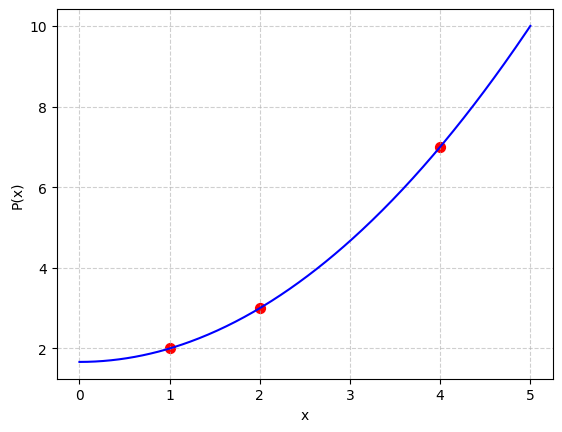

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#   Lagrange formula  
def lagrange_interpolation(x_points, y_points, x_eval):
    P = np.zeros_like(x_eval, dtype=float)
    for i in range(len(x_points)):
        L = np.ones_like(x_eval)
        for j in range(len(x_points)):
            if j != i:
                L *= (x_eval - x_points[j]) / (x_points[i] - x_points[j])
        P += y_points[i] * L
    return P

#  xample + Plot  
x_points = np.array([1, 2, 4])
y_points = np.array([2, 3, 7])

x_eval = np.linspace(0, 5, 400) #400 evenly spaced b/w 0,5
y_eval = lagrange_interpolation(x_points, y_points, x_eval)


# -- plot --
plt.plot(x_eval, y_eval, color='blue')
plt.scatter(x_points, y_points, color='red', s=50)
plt.xlabel("x"); plt.ylabel("P(x)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import init_printing

init_printing(use_latex=True)

def lagrange_interpolation_show(x_points, y_points, zoom_out_factor=1):
   
    x = sp.Symbol('x')

    #   Construct 
    terms = []
    for i in range(len(x_points)):
        L = 1
        for j in range(len(x_points)):
            if j != i:
                L *= (x - x_points[j]) / (x_points[i] - x_points[j])
        terms.append(y_points[i] * L)

    P_formula = sum(terms)
    P_expanded = sp.expand(P_formula)

    #   Display symbolic results  
    display(sp.Eq(sp.Symbol('P_formula(x)'), P_formula))
    display(sp.Eq(sp.Symbol('P_expanded(x)'), P_expanded))

    #   Plot  
    P_func = sp.lambdify(x, P_expanded, 'numpy')

    # Create evaluation grid with zoomed-out x range
    x_min, x_max = min(x_points), max(x_points)
    x_range = x_max - x_min
    x_eval = np.linspace(x_min - zoom_out_factor * x_range,
                         x_max + zoom_out_factor * x_range,
                         1000)
    y_eval = P_func(x_eval)

    # Compute y limits with zoom-out scaling
    y_min, y_max = np.nanmin(y_eval), np.nanmax(y_eval)
    if np.isfinite(y_min) and np.isfinite(y_max):
        y_range = y_max - y_min
        plt.ylim(y_min - 0.2 * y_range, y_max + 0.2 * y_range)

    plt.plot(x_eval, y_eval, color='blue', label='Polynomial Curve')
    plt.scatter(x_points, y_points, color='red', s=60, label='Data Points', zorder=5)
    plt.title("Lagrange Interpolating Polynomial (Zoomed Out)")
    plt.xlabel("x")
    plt.ylabel("P(x)")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

    return P_formula, P_expanded


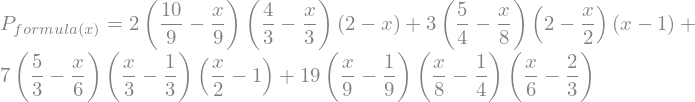

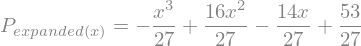

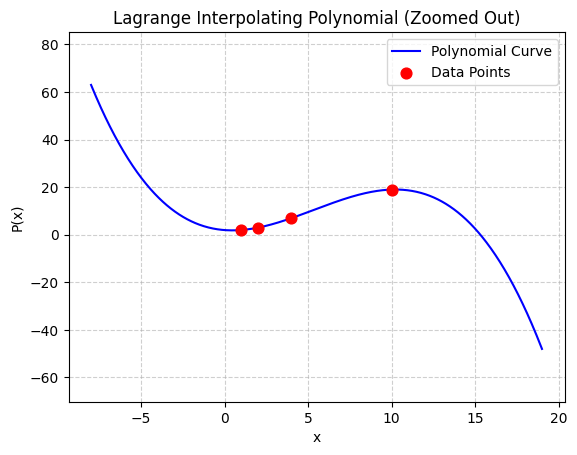

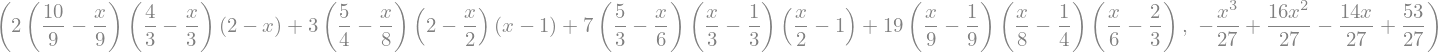

In [56]:
# Example 1: smooth and simple
lagrange_interpolation_show([1, 2, 4, 10], [2, 3, 7, 19])

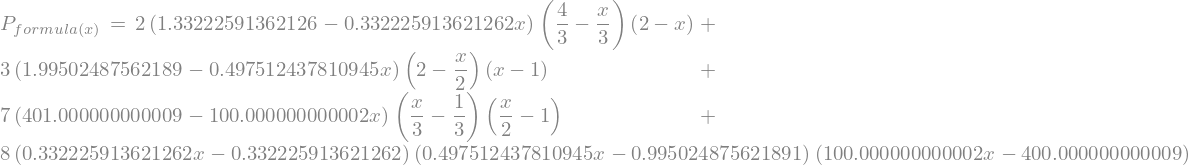

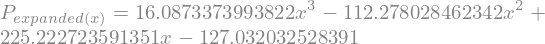

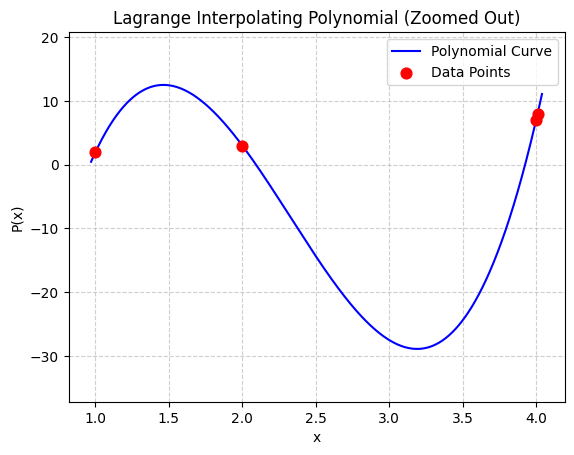

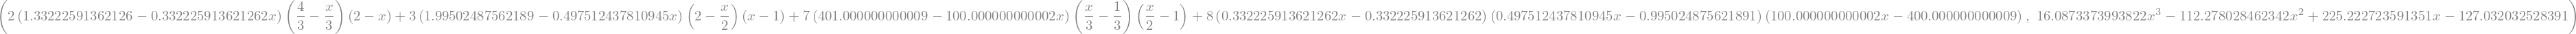

In [73]:
# Example 2: near-duplicate points (unstable)
lagrange_interpolation_show([1, 2, 4, 4.01], [2, 3, 7, 8], 0.01)

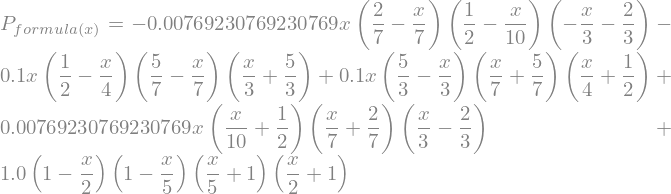

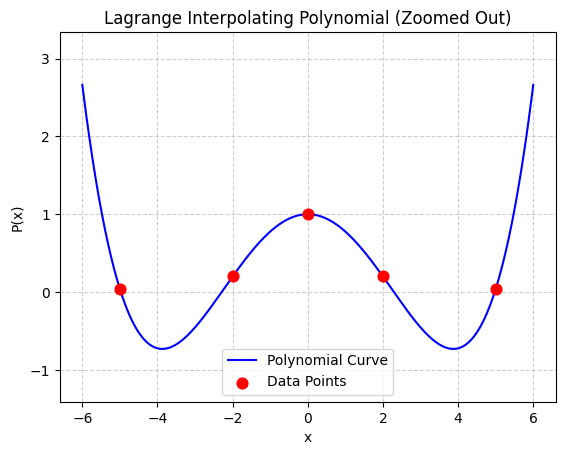

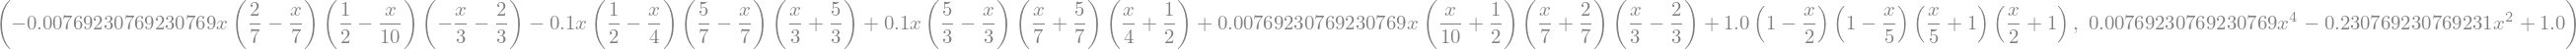

In [65]:
# Example 3: Runge phenomenon
lagrange_interpolation_show([-5, -2, 0, 2, 5], [1/(1 + x**2) for x in [-5, -2, 0, 2, 5]], 0.1)


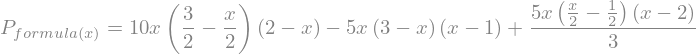

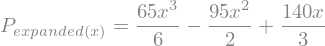

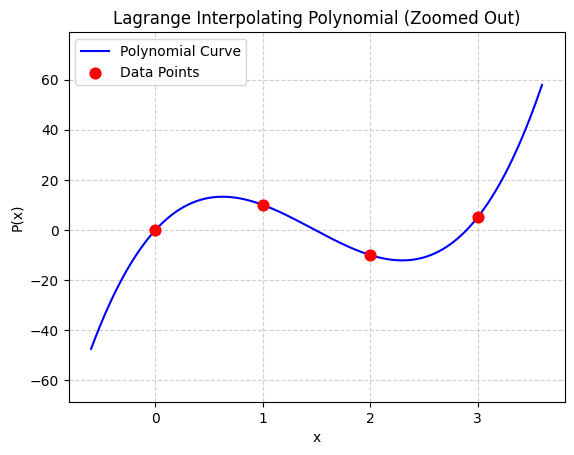

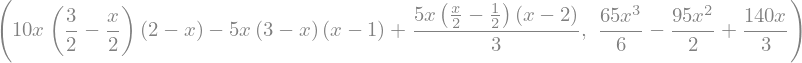

In [66]:

# Example 4: another one
lagrange_interpolation_show([0, 1, 2, 3], [0, 10, -10, 5], 0.2)

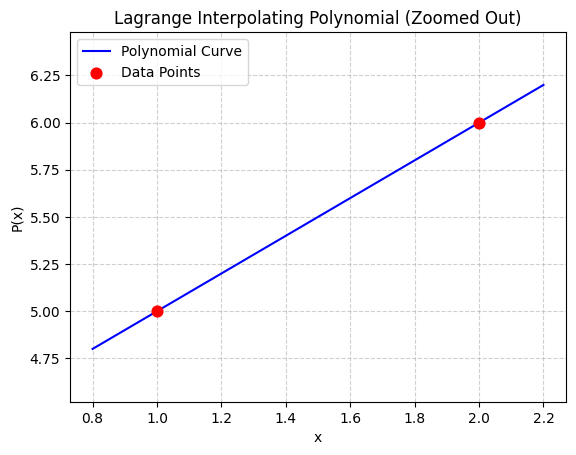

In [ ]:
# linear 
lagrange_interpolation_show([1,2], [5,6], 0.2)